In [1]:
!pip install unidecode


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import os
from unidecode import unidecode
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
os.chdir('')

FileNotFoundError: ignored

In [ ]:
os.getcwd()

In [ ]:
consumo = pd.read_parquet('/content/Consumo_horario_2021_04.parquet')

In [ ]:
consumo.info()

# Dataprep

In [5]:
def list_columns_repeated_classes(dataframe):
  """
    List blahblahblah
    Parameters
    -------------

    Returns
    -------------
  """
  columns_with_one_class = []
  for column in dataframe.columns:
    value_counts_ = dataframe[column].value_counts()
    if dataframe[column].nunique() == 1:
      columns_with_one_class.append(column)
    elif (value_counts_.values[0] == value_counts_).all() and (value_counts_.shape[0] == 3):
      columns_with_one_class.append(column)
  return columns_with_one_class

In [19]:
columns_repeated_class = list_columns_repeated_classes(consumo)


In [20]:
consumo = consumo.drop(columns = columns_repeated_class)

In [21]:
consumo.head(1)

,Data,HH,Classe do perfil do agente,Data de Migração,"Consumo no Ambiente Livre da parcela de carga - MWh (RC_AL c,j)","Consumo de energia ajustado de uma parcela de carga - MWh (RC c,j)","Consumo de energia no ponto de conexão da parcela de carga - MWh (MED_C c,j)"
0,2021-04-01,"6,0",Consumidor Especial,2020-08-01 03:00:00,"0,11349000000000001","0,11349000000000001","0,10970899999999999"


In [22]:
column_names = pd.Series(consumo.columns.values)

In [23]:
column_names = column_names.apply(
    lambda col: unidecode(
        col.lower().replace(' ', '_').replace('.', '')
    )
)

In [24]:
consumo.columns = column_names

In [26]:
consumo = consumo.rename(
    {
        'hh': 'hora',
        'consumo_no_ambiente_livre_da_parcela_de_carga_-_mwh_(rc_al_c,j)': 'consumo_livre_parcela',
        'consumo_de_energia_ajustado_de_uma_parcela_de_carga_-_mwh_(rc_c,j)': 'consumo_parcela_carga',
        'consumo_de_energia_no_ponto_de_conexao_da_parcela_de_carga_-_mwh_(med_c_c,j)': 'consumo_ponto_conexao'
    }, axis = 1
)
consumo_reduced = consumo[
    [
        'data',
        'hora',
        'consumo_livre_parcela',
        'consumo_parcela_carga',
        'consumo_ponto_conexao'
        ]
].copy()

In [27]:
string_columns = [
    'hora',
    'consumo_livre_parcela',
    'consumo_parcela_carga',
    'consumo_ponto_conexao'
]

In [ ]:
consumo_reduced = consumo_reduced.drop(columns = 'consumo_parcela_cativa')

In [29]:
consumo_reduced[string_columns] = consumo_reduced[string_columns]\
.applymap(lambda x: x.replace(',', '.'))\
.astype(float)

In [30]:
consume_columns = consumo_reduced.filter(like = 'consumo').columns.tolist()

In [31]:
consumo_reduced['consumo'] = consumo_reduced.filter(like = 'consumo').sum(axis = 1)

In [32]:
consumo_reduced = consumo_reduced.drop(columns = consume_columns)

In [33]:
consumo_reduced

,data,hora,consumo
0,2021-04-01,6.0,0.336689
1,2021-04-01,7.0,0.363890
2,2021-04-01,8.0,0.409960
3,2021-04-01,5.0,0.440626
4,2021-04-01,13.0,0.441401
...,...,...,...
2155,2021-04-09,13.0,32.240034
2156,2021-04-09,14.0,32.348968
2157,2021-04-09,17.0,32.442456
2158,2021-04-09,7.0,32.909640


# Feature Engineering e Análise

- Feriados: https://github.com/joaopbini/feriados-brasil/tree/master/dados/feriados/nacional/csv

In [41]:
consumo_reduced['consumo'].describe()

count    2160.000000
mean       31.663566
std        28.859843
min         0.125420
25%         0.845371
50%        30.586297
75%        51.049706
max        90.700821
Name: consumo, dtype: float64

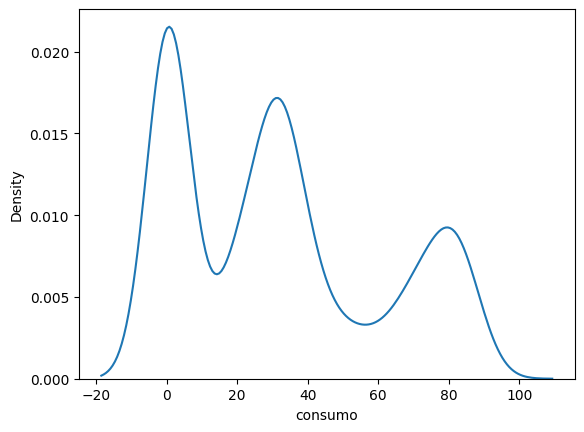

In [39]:
sns.kdeplot(consumo_reduced['consumo']);

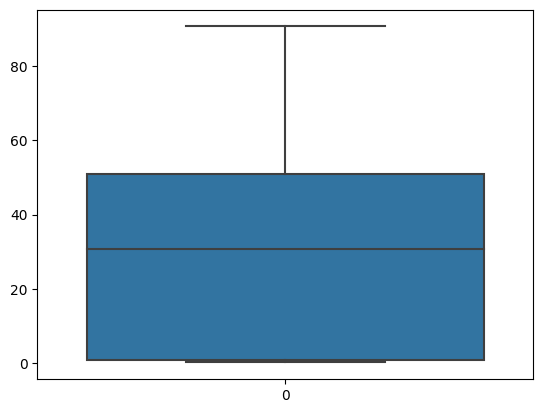

In [40]:
sns.boxplot(y = consumo_reduced['consumo']);

## Observar as lacunas na série

## Feature Engineering